Name: Suyash Kamath
---
Roll: 21102B0044
---
Class : BE CMPN B
---


In [1]:
import pandas as pd

# Load dataset (replace 'path_to_dataset.csv' with the actual file path)
df = pd.read_csv('Mall_Customers.csv')

# Display first few rows of the dataset
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' based on the data

# Fit the model
dbscan.fit(X_scaled)

# Add the cluster labels to the original data
df['Cluster'] = dbscan.labels_


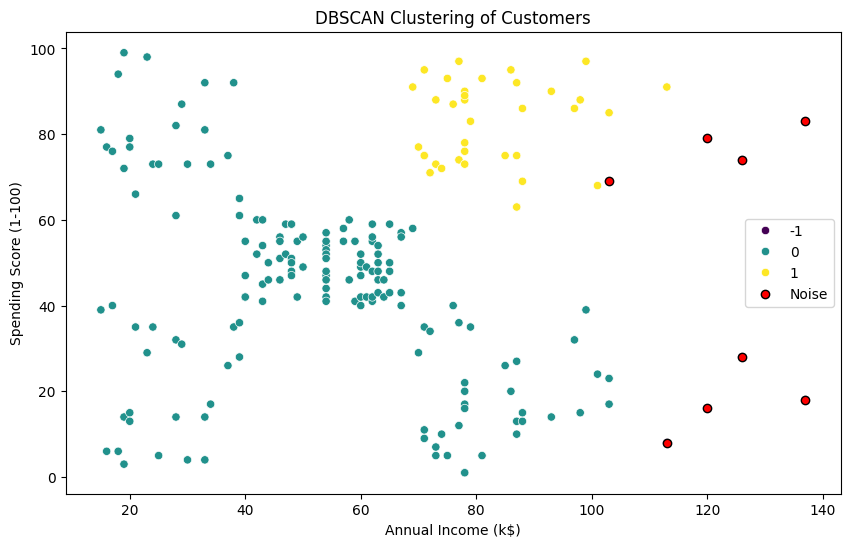

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')

# Highlight noise points
noise_points = df[df['Cluster'] == -1]
plt.scatter(noise_points['Annual Income (k$)'], noise_points['Spending Score (1-100)'], color='red', label='Noise', edgecolor='k')

plt.title('DBSCAN Clustering of Customers')
plt.legend()
plt.show()


In [5]:
# Count the number of clusters and noise points
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)  # Exclude noise points (-1)
n_noise = list(dbscan.labels_).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 2
Estimated number of noise points: 8
